In [1]:
import numpy as np
import matplotlib
#matplotlib.use('nbagg') #efforts to zoom --2 (matplotlib plots)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function
#efforts to zoom--1
# import mpld3 # this is very slowwww 
# mpld3.enable_notebook()

%matplotlib inline

In [2]:
%run ./importWalkingData.ipynb

Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)


In [3]:
def get_input_fn(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL}),
      y = pd.DataFrame(data_y[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [4]:
embedded_ffp_column = tf.contrib.layers.embedding_column(
    tf.contrib.layers.sparse_column_with_integerized_feature("FFPType", 7, combiner=None, dtype=tf.int64), dimension = 7)
# Continuous columns- frontKneesAngle	rearKneesAngle	frontAnkle	rearAnkle	frontHipsAngle
bodyZ = tf.feature_column.numeric_column("bodyAngleZ")
frontK = tf.feature_column.numeric_column("frontKneesAngle")
rearK = tf.feature_column.numeric_column("rearKneesAngle")
frontA = tf.feature_column.numeric_column("frontAnkle")
rearA = tf.feature_column.numeric_column("rearAnkle")
frontH = tf.feature_column.numeric_column("frontHipsAngle")
rearH = tf.feature_column.numeric_column("rearHipsAngle")
swingFtHt = tf.feature_column.numeric_column("swingFtHeight")
speed = tf.feature_column.numeric_column("speed")
gaitTime = tf.feature_column.numeric_column("gaitDuration")

feature_cols = [bodyZ, frontK, rearK, frontA, rearA, frontH, rearH, swingFtHt, speed, gaitTime, embedded_ffp_column]

In [5]:
# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionELU", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1, activation_fn = tf.nn.elu)

regressor = tf.estimator.DNNRegressor(
  feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionRELU", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/DNN/quadMotionRELU', '_save_summary_steps': 100, '_log_step_count_steps': 100}


In [6]:
LABEL = EMOSCORES[0]
ev = regressor.evaluate(
     input_fn=get_input_fn(X_test_all, y_test, EMOSCORES[0], num_epochs=1, shuffle=False))
print('MSE (tensorflow): {0:f}'.format(ev['average_loss']))

INFO:tensorflow:Starting evaluation at 2017-09-26-22:08:49
INFO:tensorflow:Restoring parameters from /DNN/quadMotionRELU\model.ckpt-2200000
INFO:tensorflow:Finished evaluation at 2017-09-26-22:08:49
INFO:tensorflow:Saving dict for global step 2200000: average_loss = 65.4531, global_step = 2200000, loss = 4385.36
MSE (tensorflow): 65.453140


In [7]:
predictions = regressor.predict(input_fn=get_input_fn(X_test_all, y_test, EMOSCORES[0], num_epochs=1, shuffle=False))
y_predicted = np.array(list(p['predictions'] for p in predictions))

INFO:tensorflow:Restoring parameters from /DNN/quadMotionRELU\model.ckpt-2200000


In [8]:
# Score with sklearn.
score_sklearn = metrics.mean_squared_error(y_predicted, y_test[LABEL].values)
print('MSE (sklearn): {0:f}'.format(score_sklearn))
r2_score = metrics.r2_score(y_test[LABEL], y_predicted)
print('R2 (sklearn): {0:f}'.format(r2_score))

MSE (sklearn): 65.453140
R2 (sklearn): 0.276800


In [9]:
y_hat = pd.DataFrame(y_predicted, columns=["predicted_happy"], index=y_test[LABEL].index) 
y_test[LABEL]

98     28.611601
533    -0.641151
235    17.918119
421     4.960246
2      21.003969
99     29.549051
40      7.664406
582    -1.030680
286    17.291349
460    24.830749
419     6.949376
659    -0.816644
91      5.189489
608     6.308072
596     9.569710
268     8.241356
217    11.765389
404     8.101613
26     23.400501
529    24.980060
479     3.043293
385     6.939521
97     18.621980
68     26.453003
412    26.138090
233    17.530284
651     4.035515
433    -1.336149
188    14.226348
378    18.781836
         ...    
401    -0.789735
232     3.890316
297     3.335726
89      0.321519
573     6.866221
478     6.649372
201    28.925765
228     4.734009
41     29.965213
278    -2.379585
11     18.111468
504     4.059120
607     7.191707
643    21.290722
598    15.672978
593    14.463935
29      5.561511
588    -0.669007
269    -2.035346
237    -0.545340
480     4.628530
5       6.664090
427    25.720802
208    22.836347
393     6.393609
303     5.105577
163     5.014614
319     7.2148

In [10]:
y_hat

predicted_happy
98         23.026497
533         4.545310
235        13.712001
421        11.526448
2          10.233555
99         25.972275
40          7.974918
582         9.242132
286        19.191158
460        19.422096
419        14.371286
659         6.277067
91          7.051271
608        13.993897
596         7.107750
268        13.296561
217        15.689518
404        12.942339
26          7.897924
529        22.549416
479         6.155123
385        14.788514
97         14.286857
68         20.748066
412        14.081309
233         2.882360
651        10.788956
433         8.095192
188         7.356910
378        12.265060
..               ...
401        11.273109
232        15.445281
297         8.273623
89         11.370267
573        13.057274
478         8.672441
201        20.765469
228        11.553171
41         13.365597
278         8.129766
11          9.290964
504         6.176063
607         8.804318
643         9.148724
598        13.572689
593         9.673779
29         12.095137
588         9.416681
269         6.170803
237         3.949193
480        16.246357
5           4.568838
427        22.581661
208        11.072973
393        17.808182
303         9.435943
163        13.568998
319         2.792143
597         5.098231
541        11.442343

[134 rows x 1 columns]

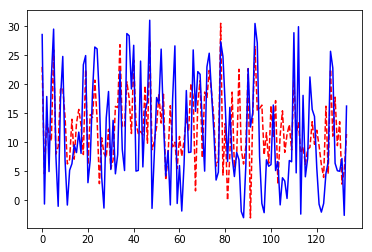

In [11]:
plt.figure()
plt.plot(y_hat.values,'r--',y_test[LABEL].values,'b')

In [12]:
y_all = pd.concat([y_hat, y_test[LABEL]], axis=1)
y_all

predicted_happy  happier_score
98         23.026497      28.611601
533         4.545310      -0.641151
235        13.712001      17.918119
421        11.526448       4.960246
2          10.233555      21.003969
99         25.972275      29.549051
40          7.974918       7.664406
582         9.242132      -1.030680
286        19.191158      17.291349
460        19.422096      24.830749
419        14.371286       6.949376
659         6.277067      -0.816644
91          7.051271       5.189489
608        13.993897       6.308072
596         7.107750       9.569710
268        13.296561       8.241356
217        15.689518      11.765389
404        12.942339       8.101613
26          7.897924      23.400501
529        22.549416      24.980060
479         6.155123       3.043293
385        14.788514       6.939521
97         14.286857      18.621980
68         20.748066      26.453003
412        14.081309      26.138090
233         2.882360      17.530284
651        10.788956       4.035515
433         8.095192      -1.336149
188         7.356910      14.226348
378        12.265060      18.781836
..               ...            ...
401        11.273109      -0.789735
232        15.445281       3.890316
297         8.273623       3.335726
89         11.370267       0.321519
573        13.057274       6.866221
478         8.672441       6.649372
201        20.765469      28.925765
228        11.553171       4.734009
41         13.365597      29.965213
278         8.129766      -2.379585
11          9.290964      18.111468
504         6.176063       4.059120
607         8.804318       7.191707
643         9.148724      21.290722
598        13.572689      15.672978
593         9.673779      14.463935
29         12.095137       5.561511
588         9.416681      -0.669007
269         6.170803      -2.035346
237         3.949193      -0.545340
480        16.246357       4.628530
5           4.568838       6.664090
427        22.581661      25.720802
208        11.072973      22.836347
393        17.808182       6.393609
303         9.435943       5.105577
163        13.568998       5.014614
319         2.792143       7.214840
597         5.098231      -2.596652
541        11.442343      16.264452

[134 rows x 2 columns]

In [13]:
y_all_sorted = y_all.sort_values("happier_score",ascending=[True])
y_all_sorted

predicted_happy  happier_score
55          6.262387      -2.999739
597         5.098231      -2.596652
278         8.129766      -2.379585
65          7.831875      -2.132387
269         6.170803      -2.035346
104         8.805195      -1.926572
491         7.609840      -1.849152
220         8.735876      -1.386359
433         8.095192      -1.336149
582         9.242132      -1.030680
659         6.277067      -0.816644
375        16.327837      -0.799872
401        11.273109      -0.789735
588         9.416681      -0.669007
533         4.545310      -0.641151
561         5.476095      -0.545366
237         3.949193      -0.545340
503        16.432358      -0.541347
89         11.370267       0.321519
479         6.155123       3.043293
297         8.273623       3.335726
72          5.897627       3.500432
232        15.445281       3.890316
651        10.788956       4.035515
504         6.176063       4.059120
394         5.631613       4.105381
399         3.511495       4.205385
226        16.204832       4.572653
480        16.246357       4.628530
228        11.553171       4.734009
..               ...            ...
643         9.148724      21.290722
505        20.648487      21.753127
256        16.783720      22.217713
508        26.861225      22.309979
35         22.710852      22.739350
208        11.072973      22.836347
19         17.633274      23.019335
26          7.897924      23.400501
131        11.888176      24.024598
440         4.359784      24.815118
460        19.422096      24.830749
529        22.549416      24.980060
133        22.425297      25.387008
427        22.581661      25.720802
406        17.855721      25.959582
388        13.326035      26.096284
412        14.081309      26.138090
68         20.748066      26.453003
87         10.026875      26.652055
349        24.180471      26.754099
595        15.538437      27.143131
258        30.550789      27.376952
456        17.655884      28.410328
98         23.026497      28.611601
16         20.449909      28.777379
201        20.765469      28.925765
99         25.972275      29.549051
41         13.365597      29.965213
451        26.522163      30.522152
489        27.564445      31.078898

[134 rows x 2 columns]

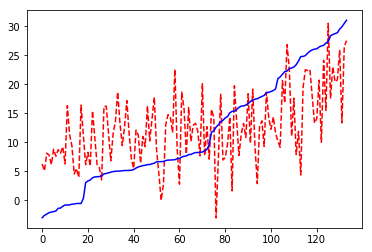

In [14]:
plt.figure()
plt.plot(y_all_sorted["predicted_happy"].values,'r--',y_all_sorted[LABEL].values,'b')

In [15]:
#sq_error = (y_predicted - np.array(y_test[LABEL].values).reshape(y_predicted.shape))**2

In [16]:
#np.sort(np.array(y_test[LABEL].values).reshape(y_predicted.shape),axis=0)